#  Strategy Backtesting Framework
### 1. Simple backtest
### 2. Function encapsulation
### 3. Introduction to commonly used backtesting frameworks

# 1. Simple backtest
The strategy backtesting is similar to a single-factor test, using only fixed-period stock holdings to obtain returns for that period, thereby achieving overall returns.

## 1.1 read data
Here, I directly read data from the local source, with market data provided by the internship company. If existing data is unavailable, you can retrieve market, financial, or some commonly used factor data from Tushare (https://tushare.pro). Students can access nearly all data permissions for free.

In [1]:
import tushare as ts
ts.set_token('2e2c63d79c07d8f2cd100e087b96921eae394d582b75de9e8fdc5277')
pro = ts.pro_api()
df = ts.pro_bar(ts_code='000001.SZ', adj='qfq', start_date='20180101', end_date='20181011')


/opt/anaconda3/lib/python3.11/site-packages/tushare/pro/data_pro.py:131: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['adj_factor'] = data['adj_factor'].fillna(method='bfill')


In [2]:
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20181011,10.05,10.16,9.70,9.86,10.45,-0.59,-5.65,1995143.83,1994186.611
1,000001.SZ,20181010,10.54,10.66,10.38,10.45,10.56,-0.11,-1.04,995200.08,1045666.180
2,000001.SZ,20181009,10.46,10.70,10.39,10.56,10.45,0.11,1.05,1064084.26,1117946.550
3,000001.SZ,20181008,10.70,10.79,10.45,10.45,11.05,-0.60,-5.43,1686358.52,1793455.283
4,000001.SZ,20180928,10.78,11.27,10.78,11.05,10.74,0.31,2.89,2110242.67,2331358.288
...,...,...,...,...,...,...,...,...,...,...,...
182,000001.SZ,20180108,13.04,13.08,12.66,12.75,13.09,-0.34,-2.60,2158620.81,2806099.169
183,000001.SZ,20180105,13.00,13.14,12.94,13.09,13.04,0.05,0.38,1210312.72,1603289.517
184,000001.SZ,20180104,13.11,13.16,12.92,13.04,13.12,-0.08,-0.61,1854509.48,2454543.516
185,000001.SZ,20180103,13.51,13.64,12.99,13.12,13.48,-0.36,-2.67,2962498.38,4006220.766


These are the codes reading the data from the tushare. 
The tokens can be obtained from the tushare website after registration and the data can be accessed following the documentation.

As for me, I accessed the data from the CSMAR database, as the tushare database has some limitations of the number of requests.
The backtesting date range I chose to be from 2018-01-01 to 2018-12-31.
The factor I selected is the amplitude factor of the stock price.
Calculation of the amptitude factor is : 
Amplitude = (high price - low price) / previous close Price

To smoothly run the code, I modified some codes slightly. 

In [3]:
import pandas as pd 

factor = pd.read_csv("stock_pred_prob_120.csv",index_col = 0) #Read a single factor data
factor

,1,2,4,5,6,7,8,9,10,11,...,603987,603988,603989,603990,603991,603993,603996,603997,603998,603999
date,,,,,,,,,,,,,,,,,,,,,
20180102,0.043226,0.045118,0.021973,0.077643,NaN,NaN,0.013652,0.013493,0.028877,0.024748,...,0.020559,0.028683,0.031315,0.023340,0.010684,0.024284,0.034139,0.021948,0.013550,0.022810
20180103,0.050887,0.048284,0.063892,0.030801,NaN,NaN,0.016037,0.018614,0.026880,0.020349,...,0.013125,0.038272,0.029934,0.013388,0.018492,0.047474,0.020230,0.012270,0.008873,0.020434
20180104,0.018223,0.042146,0.031287,0.023201,NaN,NaN,0.020905,0.024153,0.033146,0.008741,...,0.014515,0.064920,0.029041,0.008197,0.013093,0.036415,0.036523,0.015137,0.066272,0.029830
20180105,0.014981,0.084427,0.026816,0.043274,NaN,NaN,0.023747,0.018764,0.039623,0.072389,...,0.019981,0.028807,0.024344,0.027049,0.016411,0.022565,0.016556,0.026031,0.018418,0.016539
20180108,0.034049,0.049646,0.016885,0.031817,NaN,NaN,0.019069,0.022697,0.092435,0.051094,...,0.019439,0.017717,0.016066,0.058594,0.022028,0.047026,0.036335,0.025776,0.020389,0.015604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181224,0.014909,0.031894,0.025253,0.014035,0.026562,0.045906,0.056467,0.017276,0.017391,0.026531,...,0.025185,0.054078,0.030887,0.018052,0.033391,0.020151,0.017948,0.010376,0.015743,0.013779
20181225,0.023756,0.034912,0.031457,0.041010,0.041876,0.067599,0.045226,0.073177,0.051724,0.048455,...,0.046774,0.043554,0.038368,0.028177,0.073797,0.039155,0.048239,0.043507,0.030672,0.056766
20181226,0.016198,0.016927,0.017628,0.014705,0.020791,0.053154,0.037594,0.026784,0.029842,0.024364,...,0.026847,0.061279,0.023735,0.022098,0.074447,0.015828,0.023967,0.029364,0.018746,0.032063


It reads the amplitude data from the csv file. The index is the date and the columns are stock codes. 

In [4]:
import scipy.io

mkt_data = scipy.io.loadmat('Market_data_all_20190831.mat')
mkt_data


{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Oct  7 10:33:13 2024',
 '__version__': '1.0',
 '__globals__': [],
 'row_days': array([[20180102],
        [20180103],
        [20180104],
        [20180105],
        [20180108],
        [20180109],
        [20180110],
        [20180111],
        [20180112],
        [20180115],
        [20180116],
        [20180117],
        [20180118],
        [20180119],
        [20180122],
        [20180123],
        [20180124],
        [20180125],
        [20180126],
        [20180129],
        [20180130],
        [20180131],
        [20180201],
        [20180202],
        [20180205],
        [20180206],
        [20180207],
        [20180208],
        [20180209],
        [20180212],
        [20180213],
        [20180214],
        [20180222],
        [20180223],
        [20180226],
        [20180227],
        [20180228],
        [20180301],
        [20180302],
        [20180305],
        [20180306],
        [20180307],
        [201

Matlab file is read through the codes. It contains the date of stocks, the stocks, zz500pool(whether the stock is in the zz500 pool),and the stock information.

In [5]:
#Read the time list
date_list = mkt_data["row_days"].T[0]
date_list = [a for a in date_list if a > 20100101 and a < 20190101] 
date_list.sort()
date_list


[20180102,
 20180103,
 20180104,
 20180105,
 20180108,
 20180109,
 20180110,
 20180111,
 20180112,
 20180115,
 20180116,
 20180117,
 20180118,
 20180119,
 20180122,
 20180123,
 20180124,
 20180125,
 20180126,
 20180129,
 20180130,
 20180131,
 20180201,
 20180202,
 20180205,
 20180206,
 20180207,
 20180208,
 20180209,
 20180212,
 20180213,
 20180214,
 20180222,
 20180223,
 20180226,
 20180227,
 20180228,
 20180301,
 20180302,
 20180305,
 20180306,
 20180307,
 20180308,
 20180309,
 20180312,
 20180313,
 20180314,
 20180315,
 20180316,
 20180319,
 20180320,
 20180321,
 20180322,
 20180323,
 20180326,
 20180327,
 20180328,
 20180329,
 20180330,
 20180402,
 20180403,
 20180404,
 20180409,
 20180410,
 20180411,
 20180412,
 20180413,
 20180416,
 20180417,
 20180418,
 20180419,
 20180420,
 20180423,
 20180424,
 20180425,
 20180426,
 20180427,
 20180502,
 20180503,
 20180504,
 20180507,
 20180508,
 20180509,
 20180510,
 20180511,
 20180514,
 20180515,
 20180516,
 20180517,
 20180518,
 20180521,

This is the operation of getting the date and saving the date to a list in a sequential order. 




In [6]:
#Read the stock list
stock_list  = []
for i in range(len(mkt_data["column_stock"].tolist()[0])):
    stock_list.append(mkt_data["column_stock"].tolist()[0][i])
stock_list



[1,
 2,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 14,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 25,
 26,
 27,
 28,
 30,
 31,
 32,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 42,
 43,
 45,
 46,
 48,
 49,
 50,
 55,
 56,
 58,
 59,
 60,
 61,
 62,
 63,
 65,
 66,
 68,
 69,
 70,
 78,
 88,
 89,
 90,
 96,
 99,
 100,
 150,
 151,
 153,
 155,
 156,
 157,
 158,
 159,
 166,
 301,
 333,
 338,
 400,
 401,
 402,
 403,
 404,
 407,
 408,
 409,
 410,
 411,
 413,
 415,
 416,
 417,
 418,
 419,
 420,
 421,
 422,
 423,
 425,
 426,
 428,
 429,
 430,
 488,
 498,
 501,
 502,
 503,
 504,
 505,
 506,
 507,
 509,
 510,
 511,
 513,
 514,
 516,
 517,
 518,
 519,
 520,
 521,
 523,
 524,
 525,
 526,
 528,
 529,
 530,
 531,
 532,
 533,
 534,
 536,
 537,
 538,
 539,
 541,
 543,
 544,
 545,
 546,
 547,
 548,
 550,
 551,
 552,
 553,
 554,
 555,
 557,
 558,
 559,
 560,
 561,
 563,
 564,
 565,
 566,
 567,
 568,
 570,
 571,
 572,
 573,
 576,
 581,
 582,
 584,
 585,
 586,
 587,
 589,
 590,
 591,
 592,
 593,
 595,
 596,
 597,
 598,
 599,


This is the operation of getting the stock code list.

In [7]:
#Convert index constituent stock data in market data to a DataFrame
def get_index_stock(index_name):
    index_stock = pd.DataFrame(mkt_data[index_name])
    index_stock.index = mkt_data["row_days"].T[0]
    index_stock.columns = stock_list
    return index_stock.loc[date_list]

#Get the CSI 500 stock pool
index_stock = get_index_stock("zz500pool")
index_stock


,1,2,4,5,6,7,8,9,10,11,...,603987,603988,603989,603990,603991,603993,603996,603997,603998,603999
20180102,0.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20180103,0.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20180104,0.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20180105,0.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20180108,0.0,0.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181224,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20181225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20181226,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20181227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The meaning of the index_stock is to identify whether the stock is in the zz500 pool or not. The data structure is the dataframe. It uses the function to transform the data into the dataframe.

In [8]:
#Read stock return data
stock_return = pd.DataFrame(mkt_data["stk_price_info"][0], index = mkt_data["row_days"].T[0], columns = stock_list)
stock_return = stock_return.loc[date_list]

#Read data on whether stocks are traded and ST stocks
istrade = pd.DataFrame(mkt_data["stk_price_info"][5], index = mkt_data["row_days"].T[0], columns = stock_list).loc[date_list]
isst = pd.DataFrame(mkt_data["stk_price_info"][6], index = mkt_data["row_days"].T[0], columns = stock_list).loc[date_list]

#Read stock market data
stock_price_low = pd.DataFrame(mkt_data['stk_price_info'][1], index = mkt_data["row_days"].T[0],
                                     columns = stock_list).loc[date_list, stock_list]
stock_price_high = pd.DataFrame(mkt_data['stk_price_info'][2], index = mkt_data["row_days"].T[0],
                                      columns = stock_list).loc[date_list, stock_list]
stock_price_close = pd.DataFrame(mkt_data['stk_price_info'][3], index = mkt_data["row_days"].T[0],
                                       columns = stock_list).loc[date_list, stock_list]
stock_price_open = pd.DataFrame(mkt_data['stk_price_info'][4], index = mkt_data["row_days"].T[0],
                                      columns = stock_list).loc[date_list, stock_list]
split_adjusted = pd.DataFrame(mkt_data['stk_price_info'][7], index = mkt_data["row_days"].T[0],
                              columns = stock_list).loc[date_list, stock_list]
stock_return


,1,2,4,5,6,7,8,9,10,11,...,603987,603988,603989,603990,603991,603993,603996,603997,603998,603999
20180102,0.030075,0.048294,-0.001787,0.043478,NaN,NaN,0.002286,0.012448,0.011070,0.017272,...,-0.000821,-0.012027,-0.005466,0.013378,-0.001420,0.008721,-0.007058,0.005324,-0.005362,0.013004
20180103,-0.027007,-0.007064,0.065354,-0.011574,NaN,NaN,-0.002281,0.013661,0.009124,0.003513,...,0.000822,0.023748,0.015703,0.003300,0.000000,0.015850,0.000000,0.003530,0.006289,0.002567
20180104,-0.006002,0.024436,-0.023529,0.004684,NaN,NaN,-0.008000,0.029650,-0.009042,0.000583,...,0.009031,-0.001559,0.001288,0.001645,0.002489,0.025532,-0.006014,-0.006157,0.044643,-0.006402
20180105,0.003774,0.049517,-0.002582,0.011655,NaN,NaN,-0.014977,-0.011780,0.029197,0.046647,...,-0.011391,-0.012105,-0.008492,0.015873,-0.002838,-0.009682,-0.001650,-0.007080,-0.012821,0.006443
20180108,-0.025564,0.035386,-0.014668,0.006912,NaN,NaN,-0.009357,-0.003974,0.099291,-0.003900,...,-0.013169,-0.020553,0.008824,0.046067,-0.007471,0.019553,-0.014876,-0.016043,0.009524,-0.007682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181224,-0.003175,-0.015258,0.011063,0.003534,-0.011132,0.020311,0.028571,0.013304,-0.002882,0.000000,...,0.002981,0.032356,0.006354,0.009034,0.021348,0.005089,0.005181,-0.005135,0.018367,-0.005837
20181225,-0.008493,0.003769,-0.017021,-0.028169,-0.030019,0.002342,0.002525,-0.037199,0.002890,-0.026531,...,-0.023774,-0.016650,0.006314,0.004014,0.039604,-0.015190,-0.019330,-0.025806,-0.010020,-0.035225
20181226,-0.004283,-0.007092,0.008658,-0.007246,0.011605,0.016355,0.002519,0.009091,-0.017291,-0.005241,...,-0.018265,0.019920,-0.012066,0.014760,0.011640,-0.012853,-0.006570,0.018543,-0.014170,0.006085
20181227,-0.002151,-0.015126,-0.017167,-0.029197,-0.013384,-0.060920,-0.022613,-0.031532,-0.038123,-0.035827,...,-0.001550,-0.028320,-0.016610,-0.006061,-0.036611,-0.020833,-0.015873,-0.023407,-0.034908,-0.026210


The codes extract various stock data from the mkt_data dictionary, converting each data type into a DataFrame with trading dates as row indices and stock symbols as columns. Specifically, it pulls daily stock returns (stk_price_info[0]), trading status (stk_price_info[5]), ST stock indicators (stk_price_info[6]), and price data such as low, high, close, and open prices from stk_price_info[1] through stk_price_info[4], along with the split adjustment prices (stk_price_info[7]). Each dataset is filtered by the specified date_list to capture only the relevant date range.

## 1.2 Calculate the Return Rate for Each Period
(1) The factor is daily, so the return rate is calculated daily. However, note that the factor is usually calculated after the close of the day, so the factor's return rate corresponds to the next day's return.

(2) Steps: Determine the stock pool based on the factor -> Calculate stock pool weights -> Calculate stock pool return rate


In [9]:
import time
factor = factor.shift(1)[1:] # Shift the factor table down by one row to indicate that the factor's return rate should use the next day's return
start_time = time.time()
port_return = []
for date in factor.index:
    sort_fac = factor.loc[date].sort_values(ascending = False) # Sort the factor in descending order
    port_stock = sort_fac[:100].index.tolist() # Select the top 100 stocks with the highest factor values
    port_weight = pd.Series(1./len(port_stock), index = port_stock) # Assign equal weight to each stock
    port_return_day  = -(port_weight.values * stock_return.loc[date, port_weight.index.astype(int)]).sum() # Calculate stock pool return rate
    port_return.append(port_return_day) # Add the daily return to the return list
port_return = pd.Series(port_return, index = factor.index) # Convert list data into Series format, with date series as the index
end_time = time.time()
print("time used:", (end_time - start_time))
port_return


time used: 0.1454148292541504


date
20180103   -0.002782
20180104    0.006661
20180105    0.009600
20180108   -0.023649
20180109    0.002218
              ...   
20181224    0.000145
20181225   -0.014230
20181226    0.012747
20181227    0.023965
20181228    0.008623
Length: 242, dtype: float64

This code snippet calculates a portfolio's daily returns based on a given factor, shifting the factor table one row down to use the subsequent day’s returns in calculations. It iterates over each date in the factor data, sorting stocks by factor values in descending order. The top 100 stocks by factor value are selected as the portfolio, with equal weight assigned to each. The daily portfolio return is then calculated as the negative weighted sum of each stock’s return, and this return is appended to a list. Finally, the list of returns is converted into a Pandas Series with the factor dates as the index. 

Actually,I use the negative return in order to short the portfolio as the higher amplitude of returns indicates a more volatile stock price. It is more likely a factor of momentum.

In [10]:
# Use table operations to improve computation speed
import numpy as np
start_time = time.time()

min_fac = np.sort(factor.values * -1, axis = 1)[:,100] * -1 # Get the 100th largest value in each row after sorting
port_weight = (factor.T > min_fac).T # Set values larger than the 100th value in each row as TRUE; transposing is needed due to DataFrame broadcasting
port_weight = port_weight / 100. # Set equal weights

port_return = -(port_weight.values * stock_return.loc[port_weight.index, port_weight.columns.astype(int)]).sum(axis = 1) # Calculate return rate
end_time = time.time()
print("time used:", (end_time - start_time))
port_return


time used: 0.06981825828552246


date
20180103   -0.002782
20180104    0.006661
20180105    0.009600
20180108   -0.023649
20180109    0.002218
              ...   
20181224    0.000145
20181225   -0.014230
20181226    0.012747
20181227    0.023965
20181228    0.008623
Length: 242, dtype: float64

This optimized code calculates daily portfolio returns by leveraging array operations for speed. It begins by identifying the 100th highest factor value in each row (each date) and stores this threshold in min_fac. Using this threshold, it creates a weight matrix where stocks with factor values higher than the 100th value are marked True (indicating inclusion in the portfolio), and each selected stock is assigned an equal weight of 1/100. Finally, the portfolio's daily returns are computed by multiplying this weight matrix with each stock’s return, summing across rows.

It uses the numpy operation to increase the speed of the calculations.

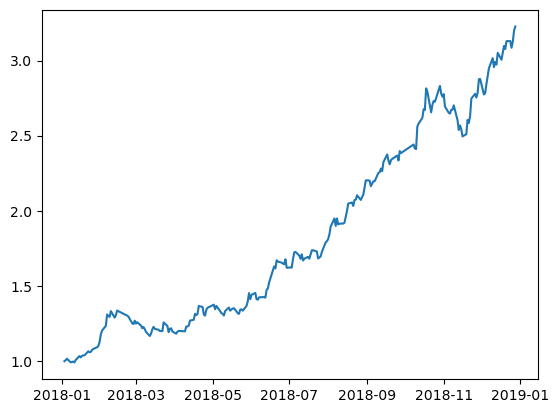

In [11]:
from matplotlib import pyplot as plt
import datetime 
cum_port_return = (port_return + 1).cumprod()
plt.figure()
x_plot = [datetime.datetime.strptime(str(d), '%Y%m%d').date() for d in cum_port_return.index]
plt.plot(x_plot,cum_port_return)
plt.show()
plt.close()

It calculates the cumulative product of the daily portfolio returns plus one to simulate growth over time, storing it in cum_port_return. 

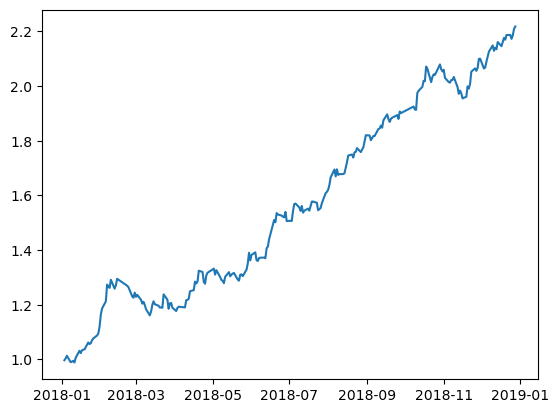

In [12]:
cum_port_return = port_return.cumsum() + 1
plt.figure()
x_plot = [datetime.datetime.strptime(str(d), '%Y%m%d').date() for d in cum_port_return.index]
plt.plot(x_plot,cum_port_return)
plt.show()


The discrepancy in port_return values stems from the two methods' differing approaches to calculating cumulative returns: one uses cumulative product , and the other uses cumulative sum.

Maybe the second is more used. As everyday we have to adjust the weights and do more adjustments. So we use the cumulative sum method to calculate the port_return.

(3) Deduct transaction costs


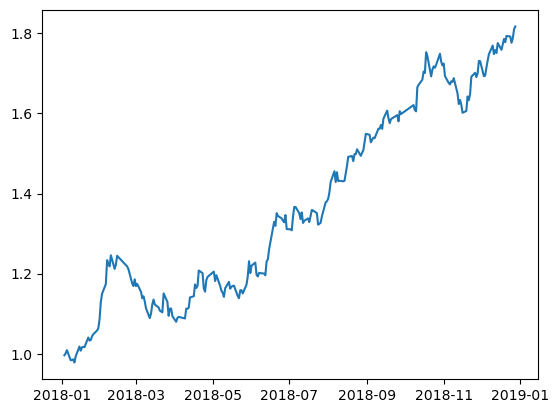

In [13]:
BP = 0.0001
# Calculate the sum of weight differences between two periods; the absolute value of weight difference is the proportion of rebalancing weight to total weight
port_weight_change = (port_weight - port_weight.shift(1)).abs().sum(axis = 1)
port_weight_change.iloc[0] = 1.
port_return_tran = port_return - port_weight_change * 10 * BP
cum_port_return = port_return_tran.cumsum() + 1
plt.figure()
x_plot = [datetime.datetime.strptime(str(d), '%Y%m%d').date() for d in cum_port_return.index]
plt.plot(x_plot, cum_port_return)
plt.show()


This code adjusts portfolio returns to account for transaction costs associated with rebalancing. It calculates port_weight_change, the sum of absolute differences in portfolio weights between two consecutive periods, to represent the total turnover as a proportion of the portfolio's total weight. Initially, the first value is set to 1. A transaction cost adjustment (port_return_tran) is then applied by subtracting the transaction costs (calculated as port_weight_change * 10 * BP, where BP is the cost per basis point).

(5) Usually need to be hedged with a stock index to hedge out market (beta) risk

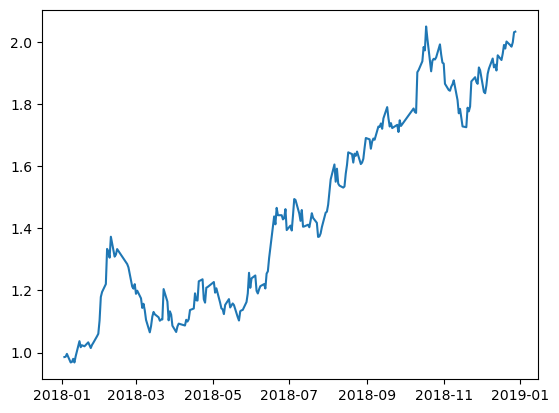

In [14]:
index_stock = index_stock.replace(0,np.nan)
benchmark  = (index_stock * stock_return.loc[index_stock.index,index_stock.columns]).mean(axis = 1,skipna  = True)
port_return_tran = port_return_tran - benchmark[port_return_tran.index]

cum_port_return = port_return_tran.cumsum() + 1
plt.figure()
x_plot = [datetime.datetime.strptime(str(d), '%Y%m%d').date() for d in cum_port_return.index]
plt.plot(x_plot,cum_port_return)
plt.show()

This code adjusts the transaction cost-adjusted portfolio returns by subtracting a benchmark return, effectively calculating the portfolio's excess return over the benchmark. First, index_stock is modified to replace any zero values with NaN to exclude these from calculations. The benchmark return is then computed by multiplying index_stock by stock_return, averaging across columns (i.e., stocks) while skipping NaN values. This benchmark return is subtracted from the transaction-adjusted portfolio return (port_return_tran) to obtain the excess return. 

This is a method to hedge the market risk(here the zz500pool denotes the market risk).

## 1.3 Calculation of relevant backtesting indicators

In [15]:
def MaxDrawdown(df, cal_type = 0):
    '''Maximum Drawdown'''
    if cal_type == 0:
        df = (df + 1).cumprod()
    elif cal_type == 1:
        df = df.cumsum() + 1
    j = np.argmax((np.maximum.accumulate(df.values) - df.values)) # End position
    if j == 0:
        return 0
    i = np.argmax(df.values[:j])  # Start position
    return (df.values[i] - df.values[j]) / (df.values[i]) * 100, df.index[i], df.index[j]

def annualized_return(df, cal_type = 0):
    '''Annualized Return'''
    if cal_type == 0:
        df = (df + 1).cumprod() 
        return (df.values[-1] ** (260. / float(len(df))) - 1) * 100
    elif cal_type == 1:
        return df.mean() * 250 * 100
    
def annualized_volatility(df):
    '''Annualized Volatility'''
    return (260.**0.5 * df.std(ddof = 1)) * 100

def port_IR(df, cal_type = 0):
    if (cal_type == 0):
        return annualized_return(df) / annualized_volatility(df)
    elif (cal_type == 1):
        return annualized_return(df, 1) / annualized_volatility(df)


In [16]:
print ("MaxDrawdown:",MaxDrawdown(port_return_tran,cal_type = 1))
print ("annualized_return:",annualized_return(port_return_tran,cal_type = 1))
print ("annualized_volatility:",annualized_volatility(port_return_tran))
print ("port_IR:",port_IR(port_return_tran,cal_type = 1))

MaxDrawdown: (15.829236810844666, 20181018, 20181119)
annualized_return: 106.77698632264936
annualized_volatility: 54.329368904898935
port_IR: 1.9653640098333844


MaxDrawdown: Calculates the maximum drawdown percentage, which is the largest peak-to-trough decline in the portfolio. If cal_type is 0, it assumes compounded returns, converting the series to cumulative product format; if 1, it uses cumulative sum. It finds the start (i) and end (j) indices of the maximum drawdown period and returns the drawdown percentage and the dates at the peak and trough;

annualized_return: Computes the portfolio's annualized return. With cal_type 0, it uses compounded returns, taking the final cumulative product value and annualizing it based on a 260-day trading year. If cal_type is 1, it assumes simple returns and annualizes the mean return by multiplying by 250;

annualized_volatility: Calculates the annualized standard deviation of returns (volatility), assuming a 260-day trading year. It scales the standard deviation by the square root of 260 to annualize.

port_IR: Calculates the information ratio (IR), which is the ratio of annualized return to annualized volatility. Depending on cal_type, it either uses compounded or simple return methods to compute the IR.

## 1.4 Points of Frequent Attention
(1) Stocks that cannot be traded

In [17]:
port_weight_temp = port_weight.copy()
# port_weight = port_weight_temp.copy()

This code creates a backup copy of the port_weight DataFrame in port_weight_temp, preserving the current state of the portfolio weights. This allows for future modifications to port_weight while retaining the original values in port_weight_temp for reference or to revert changes if needed.

In [18]:
# Limit Up and Limit Down
A = ((stock_price_high / stock_price_close.shift(1) - 1) < -0.0985).astype(int)
B = ((stock_price_low / stock_price_close.shift(1) - 1) > 0.0985).astype(int)
# Suspension
C = (istrade == 0).astype(int)
# ST (Special Treatment)
D = (isst == 1).astype(int)

not_trade = (A | B | C).replace(0, np.nan)[port_weight.columns.astype(int)] # Standardize stock list
not_buy = D.replace(0, np.nan)[port_weight.columns.astype(int)] # Standardize stock list


This code marks stocks that are unavailable for trading due to certain conditions, setting them to NaN for exclusion from the portfolio. It identifies stocks that have hit daily price limits, where the stock's high price is down more than 9.85% or the low price is up over 9.85% from the previous close, marking these as 1 (unavailable) and 0 otherwise. It also identifies stocks that are suspended from trading (istrade is 0) and stocks with "ST" (Special Treatment) status, where isst is 1. Using these conditions, not_trade consolidates stocks restricted by price limits or suspension, marking them as NaN within the stock list (port_weight.columns), while not_buy sets "ST" stocks to NaN across the same list, ensuring they are excluded from purchase consideration.

In [19]:
for ii in range(len(port_weight.index)):
    not_trade_day = not_trade.loc[date].dropna().index.astype(str).tolist() # Select the list of stocks that cannot be traded
    not_buy_day = not_buy.loc[date].dropna().index.astype(str).tolist() # Select the list of stocks not to buy
    
    if ii == 0:
        date = port_weight.index[ii]
        port_weight.loc[date, not_trade_day] = 0.
        port_weight.loc[date, not_buy_day] = 0.
        port_weight.loc[date] = port_weight.loc[date] / port_weight.loc[date].sum()
    else:
        date = port_weight.index[ii]
        last_date = port_weight.index[ii - 1]
        port_weight.loc[date, not_trade_day] = port_weight.loc[last_date, not_trade_day] # Retain the previous period's weight for stocks that cannot be traded
        port_weight.loc[date, not_buy_day] = 0.
        res_weight = 1 - port_weight.loc[last_date, not_trade_day].sum()
        trade_day = list(set(port_weight.columns.tolist()) - set(not_trade_day))
        port_weight.loc[date, trade_day] = port_weight.loc[date, trade_day] * res_weight
port_weight.sum(axis = 1)


date
20180103    1.000000
20180104    0.930000
20180105    0.960400
20180108    0.891089
20180109    0.960000
              ...   
20181224    0.910000
20181225    0.901000
20181226    0.911782
20181227    0.941776
20181228    0.890000
Length: 242, dtype: float64

This code iterates through each date in the port_weight index, adjusting the portfolio weights based on stocks' trading availability. For each day, it first identifies the list of stocks that cannot be traded (not_trade_day) and stocks that should not be bought (not_buy_day). On the first day, all weights for these unavailable stocks are set to zero, and the remaining weights are normalized to sum to one. For subsequent dates, stocks in the not_trade_day list inherit their weights from the previous date (since they cannot be traded), while those in the not_buy_day list are set to zero. The remaining weight is then redistributed among the tradeable stocks (those not in not_trade_day). Finally, the portfolio weight for each date is normalized so that the total weight sums to one, ensuring the portfolio is fully allocated each day.

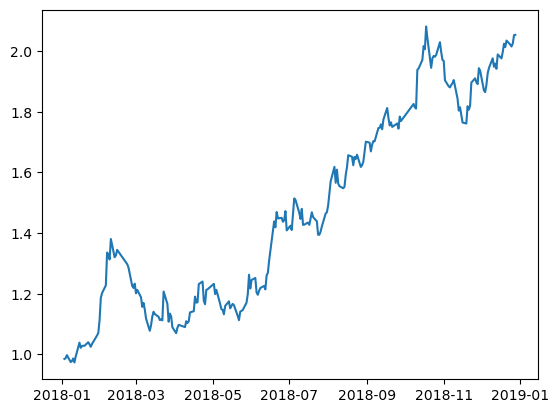

In [20]:
port_return = -(port_weight.values * stock_return.loc[port_weight.index,port_weight.columns.astype(int)]).sum(axis = 1)#Calculation of the rate of return
port_weight_change = (port_weight - port_weight.shift(1)).abs().sum(axis = 1)
port_weight_change.iloc[0] = 1.
port_return_tran  = port_return - port_weight_change*10*BP
port_return_tran = port_return_tran - benchmark[port_return_tran.index]

cum_port_return = port_return_tran.cumsum() + 1
plt.figure()
x_plot = [datetime.datetime.strptime(str(d), '%Y%m%d').date() for d in cum_port_return.index]
plt.plot(x_plot,cum_port_return)
plt.show()

This code calculates the portfolio’s adjusted cumulative returns by accounting for transaction costs and benchmark excess returns. It first computes daily portfolio returns (port_return) by taking the weighted sum of individual stock returns and then subtracts transaction costs, which are estimated as the sum of absolute weight changes (port_weight_change) multiplied by 10 basis points. The initial weight change is set to 1 to account for the first transaction. The resulting transaction-adjusted return (port_return_tran) is further adjusted by subtracting the benchmark return, isolating the portfolio’s excess return over the benchmark. 

(2) Change in Stock Weights  
After executing trades to achieve target stock weights for the day, the weights may shift due to one day's trading, which can cause issues if some stocks retain the previous period's weights.  

It is necessary to update stock weights before calculating returns. Specifically, the daily return is divided into two segments: the first from the previous day's close to the current day's open, and the second from the current day's open to the close.


In [21]:
date_list_ = factor.index.tolist() 
port_return = pd.Series(index = date_list_)
turnover_rate = pd.Series(index = date_list_)
last_weight = pd.Series([0]*len(factor.columns), index = factor.columns)
for date in date_list_:
    today_date_index = date_list_.index(date)
    sort_fac = factor.loc[date].sort_values(ascending = False) # Sort the factor in descending order
    port_stock = sort_fac[:100].index.tolist() # Select the top 100 stocks with the highest factor values
    port_weight = pd.Series(index = factor.columns)
    port_weight[port_stock] = 1. / len(port_stock) # Assign equal weight to each stock
    if date == date_list_[0]: # For the first period
        new_weight = port_weight # The stock pool weight for the day is the target weight
        turnover_rate[date] = ((new_weight.fillna(0) - last_weight.fillna(0)).abs().sum()) * 100 # Calculate turnover rate
        # Calculate the weight at close
        close_weight = new_weight.values * (stock_price_close.loc[date, new_weight.index.astype(int)] / stock_price_open.loc[date, new_weight.index.astype(int)])  
        transaction_cost = turnover_rate[date] / 100 * 10 * BP
        port_return[date] = close_weight.sum() - 1 - transaction_cost
        last_weight = close_weight / close_weight.sum()
    else:
        last_date = date_list_[today_date_index - 1] 
        # Calculate weight at open, derived from last period's weight adjusted for price gap
        open_weight = last_weight.values * (stock_price_open.loc[date, last_weight.index.astype(int)]) / (stock_price_close.loc[last_date, last_weight.index.astype(int)])
        open_weight_sum = open_weight.sum()
        # Adjust target weight to total weight after gap
        new_weight = port_weight * open_weight_sum
        turnover_rate[date] = ((new_weight.fillna(0) - open_weight.fillna(0)).abs().sum()) / open_weight_sum * 100 / 2
        close_weight = new_weight.values * (stock_price_close.loc[date, new_weight.index.astype(int)] / stock_price_open.loc[date, new_weight.index.astype(int)])
        transaction_cost = turnover_rate[date] / 100 * 10 * BP
        port_return[date] = close_weight.sum() - 1 - transaction_cost
        last_weight = close_weight / close_weight.sum()
-port_return


20180103   -0.004628
20180104    0.006502
20180105    0.014597
20180108   -0.011268
20180109    0.015844
              ...   
20181224    0.000580
20181225   -0.006047
20181226    0.012069
20181227    0.017000
20181228    0.028417
Length: 242, dtype: float64

This code calculates the daily portfolio return and turnover rate, accounting for transaction costs, in a strategy that rebalances based on the top 100 stocks by factor value each day. It iterates through each date in date_list_, where the top 100 stocks by factor score are selected and assigned equal weight. On the first date, this target weight (new_weight) becomes the initial portfolio weight, and the turnover rate is calculated as the absolute difference from the prior (zero) weights. Portfolio returns are then calculated based on closing weights adjusted by intraday price movements (close-to-open price ratios) and reduced by transaction costs (derived from turnover rate and a fixed basis point cost). For subsequent dates, the previous day’s closing weights (last_weight) are adjusted by overnight price movements (open-to-close), recalculating the opening weight for the current date. The target weight is then rebalanced and adjusted to the portfolio’s total weight, with transaction costs recalculated and deducted. The resulting daily returns are stored in port_return, while last_weight updates for use in the next iteration. Finally, port_return is negated for a standardized return series.

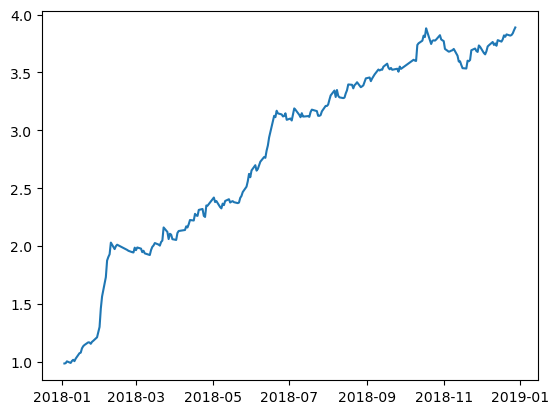

In [22]:
port_return_ab = -port_return - benchmark[port_return_tran.index]

cum_port_return = port_return_ab.cumsum() + 1
plt.figure()
x_plot = [datetime.datetime.strptime(str(d), '%Y%m%d').date() for d in cum_port_return.index]
plt.plot(x_plot,cum_port_return)
plt.show()

This code calculates the portfolio's excess return over the benchmark and plots its cumulative value over time. It starts by computing the adjusted portfolio return relative to the benchmark (port_return_ab) by subtracting benchmark from the negative of port_return, resulting in the portfolio's performance above or below the benchmark. 

# 2 Function encapsulation

# 3. Common backtesting frameworks


Zipline (https://github.com/quantopian/zipline): Has the largest community, clear syntax, easy to learn, mainly used for the U.S. stock market, with relatively slow backtesting speed.  
PyAlgoTrade (https://github.com/gbeced/pyalgotrade): Faster and more flexible, but does not support Pandas.  
vnpy (https://www.vnpy.com): Originated from proprietary quantitative trading systems in domestic private equity. Supports numerous trading interfaces, can be operated via a graphical interface, and has high strategy extensibility.  
RiceQuant, JoinQuant, Uqer: Domestic quantitative platforms, quite similar to each other. Support data reading and processing in Python and provide APIs for backtesting. Specific backtesting code is not visible and is mainly used by individual investors.  
Feature: Event-driven backtesting platforms


(1) Event Module  
The event module includes a base class for events, with various sub-events beneath it, such as market data events (market), trading signal events (signal), order placement events (order), and order fill events (fill). Additionally, an event queue is needed to store and manage all sub-events.  

(2) Data Collection Module  
The data collection module can obtain current market and historical data through interfaces, capable of generating market data events. Historical data can be directly read from our established database, while real-time market data may require interfaces from trading software.  

(3) Strategy Module  
The strategy module is similar to a simple backtesting system; it inputs bar or tick data to generate signals and can produce signal events.  

(4) Trade Execution Module  
The trade execution module receives signal events, decides the amount of positions to open and close, and outputs order placement events. Based on the order placement events, it conducts simulated or real trades, updating holdings and other relevant data once the order fill event is completed.  

(5) Asset Position Module  
The asset tracking module links various events, recording information on funds, positions, and position market value. When a position changes, all related data in the asset position module is updated. Another purpose of this module is to trace the entire process of strategy execution, recording all transaction history information.  

(6) Event Queue  
In the backtesting system, all events are managed through an event queue. Once an event completes its task, it automatically moves to the end of the queue, allowing the next event to start its task, creating a continuous loop.
